# HW 7 - Monte Carlo

## Importance Sampling
Calculate a value for the integral

$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $

using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.

In [14]:
# Ronaldo Ascano
# due 10.17.18

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, quadrature
from scipy import integrate
from numba import jit
import random

# resize figure and font
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams.update({'font.size': 15})

In [2]:
@jit
def Simpson_Rule(a, b, n, plot=1):

    h = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)

    base = (b - a) / n
    results_x = np.linspace(a, b, n+1)
    height = h(results_x)
    area = np.empty([n+1], float)
    
    for i in range(n+1):
        
        # determines coefficients for each ith entry
        if i == 0 or i == n:
            coef = 1/3               # if i is the first and last then coef=1/3
        elif i%2 == 1:
            coef = 4/3               # if i is divisible by 2 then coef=4/3
        else: 
            coef = 2/3               # else if i is odd then coef=2/3
            
        area[i] = coef*height[i]*base
                
    if plot == 1:
        
        x = np.linspace(a, b, n)
        output_y = h(x)
        plt.plot(x, output_y, 'r')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.xlim([a,b])
        y2 = np.array([0,0])
        
        for i in range(n):
            
            x0 = results_x[i:i+2]
            y1 = height[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='yellow')
            linex, liney = [results_x[i+1], results_x[i+1]], [0, height[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)
            plt.title("Simpson's Rule")
        plt.show
        print("Area using Simpson's rule: ", sum(area))


            
    return sum(area)

Area using Simpson's rule:  inf


/Users/ronascano/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

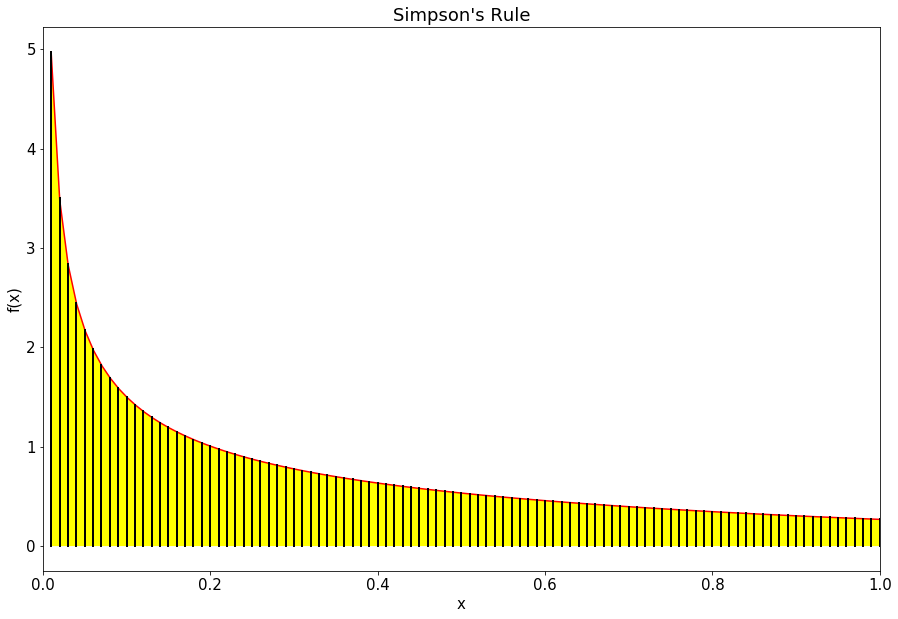

In [15]:
Simpson_Rule(0,1,100)

### Above, we cannot calculate the area because of its divergence.

### Below, we will use importance sampling to avoid the divergence error.

In [4]:
f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)

integrate_f = integrate.quad(f,0,1)[0]

print('From scipy:', integrate_f)
print('')

From scipy: 0.8389329600133838



In [5]:
w = lambda x: 1/np.sqrt(x)        # weight function

p = lambda x: 1/2*np.sqrt(x)      # probability function

c = lambda x: np.sqrt(x)          # cumulative function
inverse_c = lambda x: x**2        # inverse cumulative function

integrate_w = integrate.quad(w,0,1)[0]

sum_of_ratios = []

@jit
def importance_sampler(N):
    
    for i in range(N):                         # up to N random points
        x = random.random()
        y = inverse_c(x)
        sum_of_ratios.append(f(y)/w(y))

    I = (sum(sum_of_ratios)*integrate_w)/N

    return I

print('Area using importance sampling: ', importance_sampler(1000000))
print('')
#print(integrate_w)

# which do you trust more scipy or importance sampling?

Area using importance sampling:  0.838944940677381



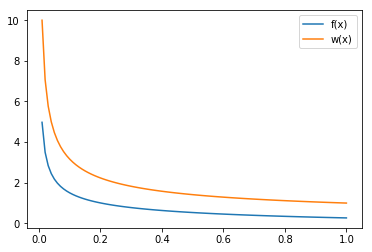

In [6]:
x = np.linspace(0.01,1,100)

plt.plot(x,f(x), label='f(x)')
plt.plot(x,w(x), label='w(x)')
plt.legend()

# Monte Carlo Integration

1. Monte Carlo Integral:

   Calculate the area shaded in green.


2. Error Analysis:

   Try to do the integral many times (100) for different $N$ values (100, 1000, 10000, 100000), collect the data and      calculate its standard variance.

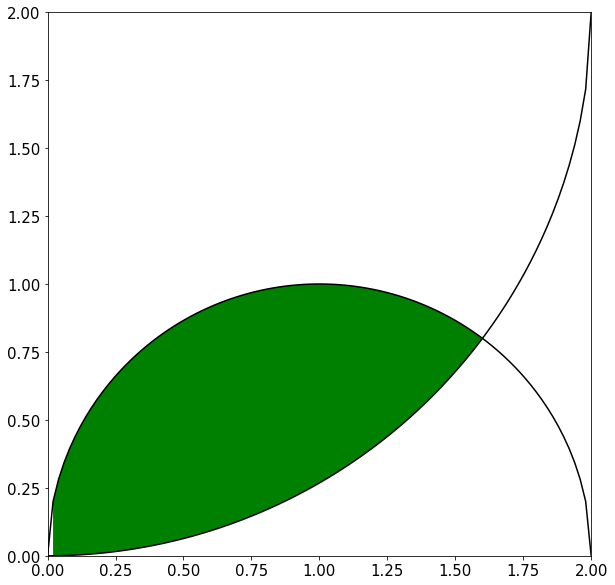

In [16]:
# From Prof Zhu's Repo

import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
y1 = np.sqrt(1-(x1-1)**2)
ax1.plot(x1,y1,'k')

y2 = 2-np.sqrt(4-x1**2)
ax1.plot(x1,y2,'k')

ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, y1, y2, where=y1>y2, facecolor='green')

plt.show()

In [8]:
# define functions
def J(x):
    return np.sqrt(1-(x-1)**2)
def K(x):
    return 2-np.sqrt(4-x**2)

# try scipy integrate to find area (find intersection: x=1.6)
integrate_J = integrate.quad(J,0,1.6)[0]
integrate_K = integrate.quad(K,0,1.6)[0]

# Area = area of top function - area of bottom function
Area = integrate_J - integrate_K

In [9]:
print('Area of the shaded green using scipy: ', Area)

Area of the shaded green using scipy:  0.9617391537973146


## Using MONTE CARLO INTEGRATION

In [31]:
@jit
def MC(N):
    count = 0
    for i in range(N):
        x = 2*random.random()
        y = random.random()
        if K(x) < y < J(x):
            count += 1
    I = 2*count/N
    return I

#def MC2(N):
#    I = 0
#    for i in range(N):
#        x = 2*random.random()
#       I += K(x)/J(x)
              
#    return I/N*2

In [32]:
print('Area using MC at N=100: ', MC(100))
print('Area using MC at N=1000: ', MC(1000))
print('Area using MC at N=10000: ', MC(10000))
print('Area using MC at N=100000: ', MC(100000))
print('')
#print(MC2(100))
#print(MC2(1000))
#print(MC2(1000))
#print(MC2(10000))

Area using MC at N=100:  1.08
Area using MC at N=1000:  0.972
Area using MC at N=10000:  0.9662
Area using MC at N=100000:  0.96164

1.947708323485899
1.915987250018721
1.5140418950023373
1.643267347929992


## Error Analysis

In [12]:
# create list containing different N values
N_values = [100,1000,10000,100000]
arealist = []


# generate 100 samples (using different N-values) to calculate the area, and put into list
@jit
def MC_stat(Nsamples):
    
    for i in range(Nsamples+1):
        random_N = random.choice(N_values)          # random.choice(mylist) pick random element from list
        arealist.append(MC(random_N))
        #print(random_N)
    
    #print(arealist)
    var = np.var(arealist)
    std = np.std(arealist)
    avg = np.mean(arealist)
    
    print('Variance: ', var)
    print('Deviation: ', std)
    print('Average Area: ', avg)
        
    return arealist[-24:-1]

# display variance, deviation, mean

In [13]:
MC_stat(100)

Variance:  0.0026749283059307907
Deviation:  0.051719709066571425
Average Area:  0.9595900990099008


[0.94,
 0.99,
 0.953,
 0.994,
 1.06,
 0.972,
 0.92,
 1.0,
 1.02,
 0.963,
 0.9636,
 0.95966,
 0.9672,
 0.974,
 0.998,
 0.9628,
 0.9484,
 0.9565,
 0.918,
 0.98,
 0.96292,
 1.014,
 0.92]

## The variance is quite low meaning the data is not spread apart. Also, the mean area using MC is close to the scipy-calculated area. Thus, the Monte Carlo integration method should become even more accurate with larger amount of sample areas in the list/array.